# Importar librerías

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, confusion_matrix


# Cargar datos

In [2]:
data = pd.read_csv('./breast+cancer+wisconsin+diagnostic/wdbc.data',sep=",", names=["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2", "radius3", "texture3",
"perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"])

# Preprocesamiento de datos

In [3]:
data.shape

(569, 32)

In [4]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
data["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [7]:
data["Diagnosis"].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='Count'>

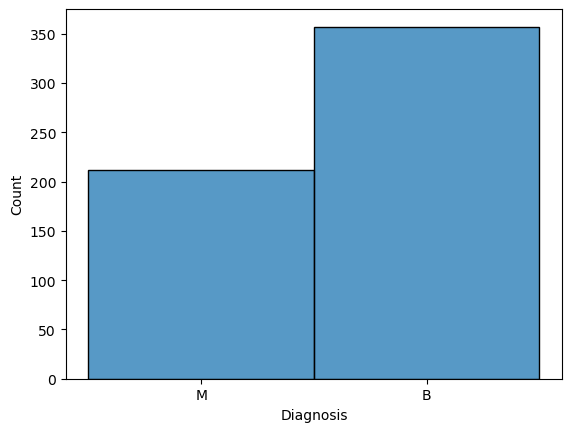

In [8]:
sns.histplot(data['Diagnosis'])

In [9]:
#Se reemplaza M con 1 y B con 0
print("Malignant = 1, Benign = 0")
data["Diagnosis"]= data["Diagnosis"].map(lambda row: 1 if row=='M' else 0)

Malignant = 1, Benign = 0


In [10]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Validar valores nulos
valor_null = data.isnull().values.any()
if valor_null == True:
    print("Hay valores nulos en los datos")
else:
    print("No hay valores nulos en el conjunto de datos")

No hay valores nulos en el conjunto de datos


In [12]:
data.drop('ID',axis=1,inplace=True)

In [13]:
data.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.isnull().sum()

Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

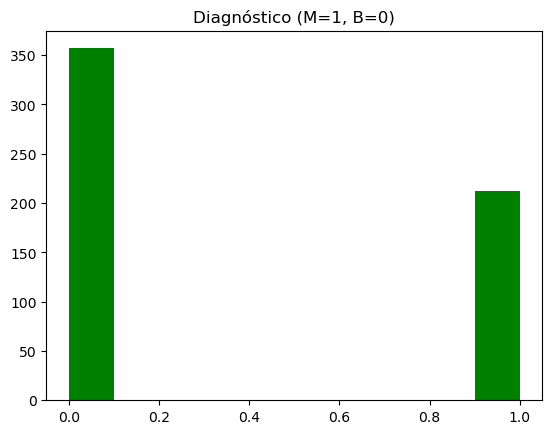

In [15]:
plt.hist(data['Diagnosis'] , color='g')
plt.title('Diagnóstico (M=1, B=0)')
plt.show()

In [16]:
data.corr()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius1,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


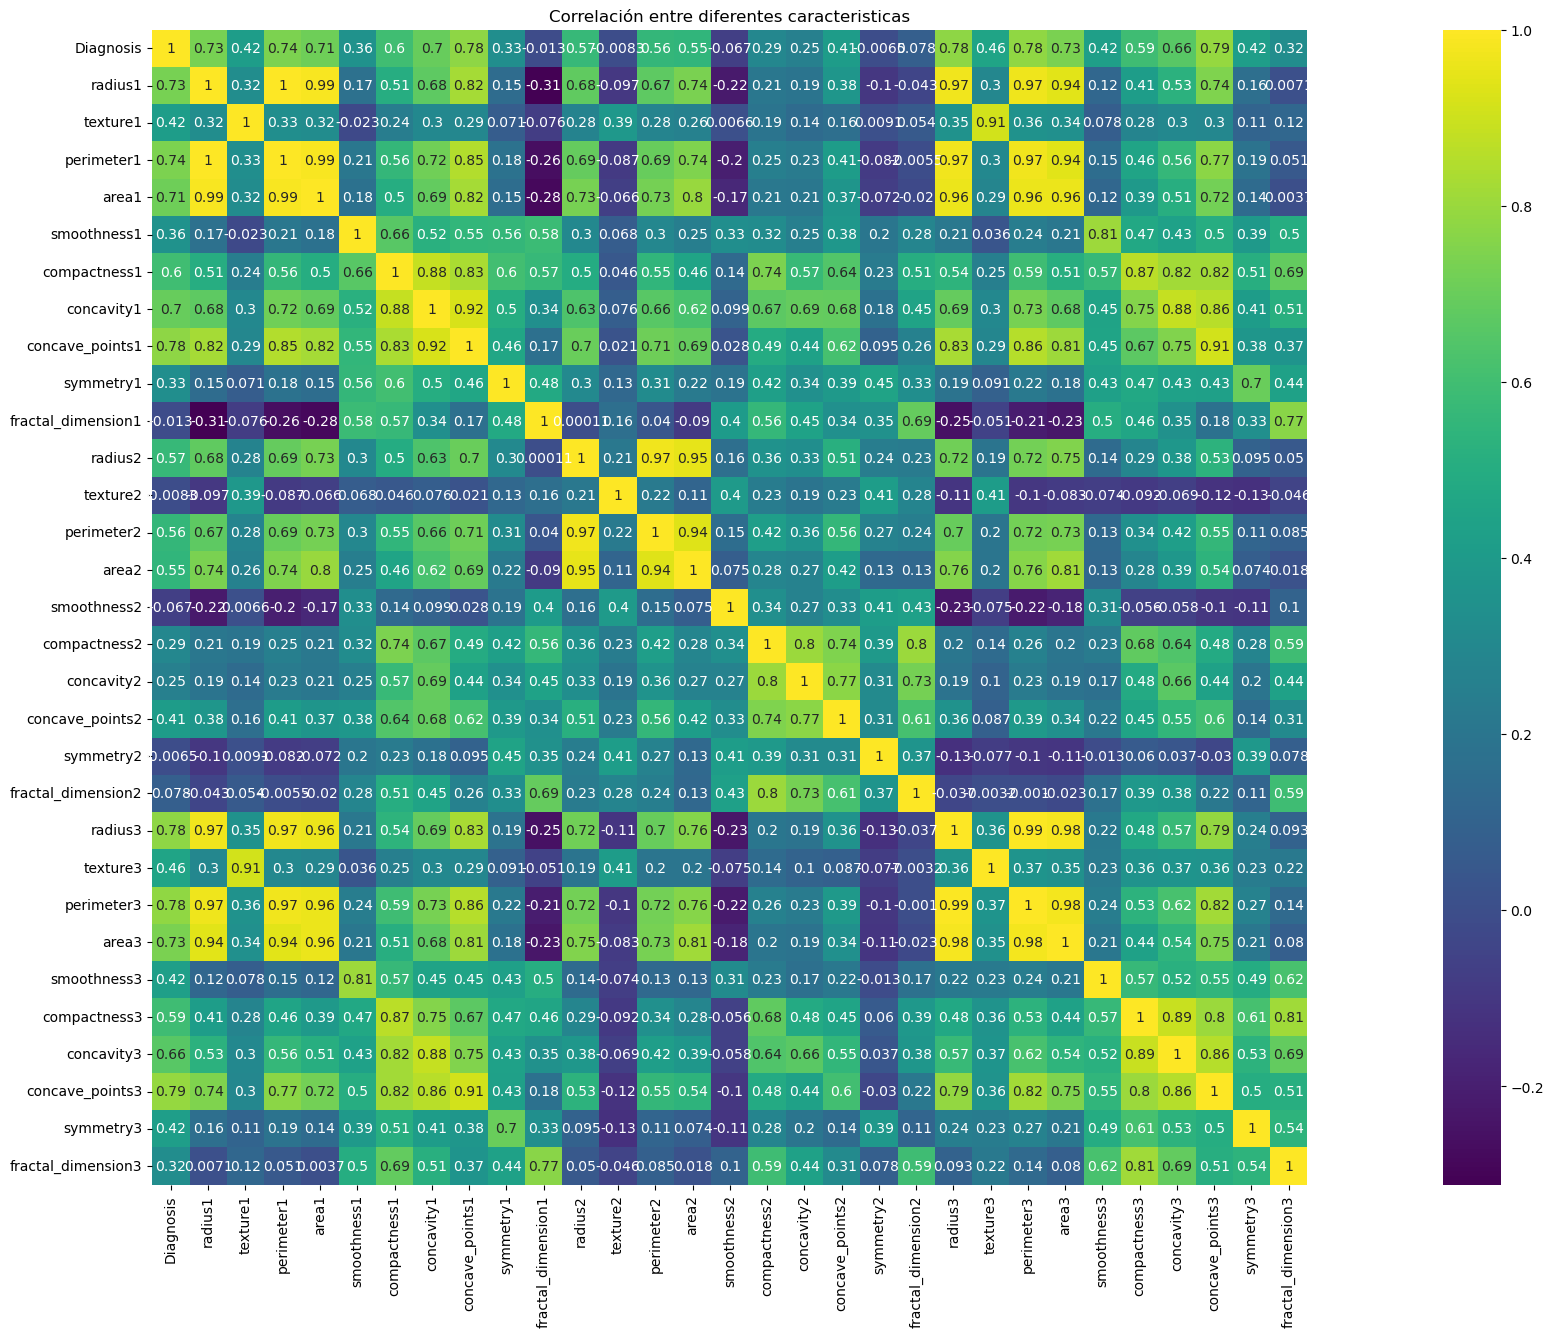

In [17]:
plt.figure(figsize=(35,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlación entre diferentes caracteristicas')
plt.show()

# DATOS PARA ENTRENAMIENTO Y TEST

In [18]:
x=data.drop('Diagnosis', axis=1)
y=data['Diagnosis']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=42)

In [20]:
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {x_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 398
Tamaño del conjunto de prueba: 171


# MODELO DE APRENDIZAJE ÁRBOL DE DECISIÓN

In [21]:
# Inicializar y entrenar el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = clf.predict(x_test)

In [23]:
#Predicciones y evaluación final en el conjunto de prueba para árbol de decisión (datos de test)
clf_prediction_test = clf.predict(x_test)
print("árbol de decisión en el conjunto de prueba:")
print(classification_report(y_test, clf_prediction_test))

árbol de decisión en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [24]:
#Predicciones y evaluación final en el conjunto de prueba para árbol de decisión (datos de test)
clf_prediction_train= clf.predict(x_train)
print("árbol de decisión en el conjunto de entrenamientto:")
print(classification_report(y_train, clf_prediction_train))

árbol de decisión en el conjunto de entrenamientto:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [25]:
def mostrar_matriz_confusion(cm, title='Matriz de Confusión'):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()

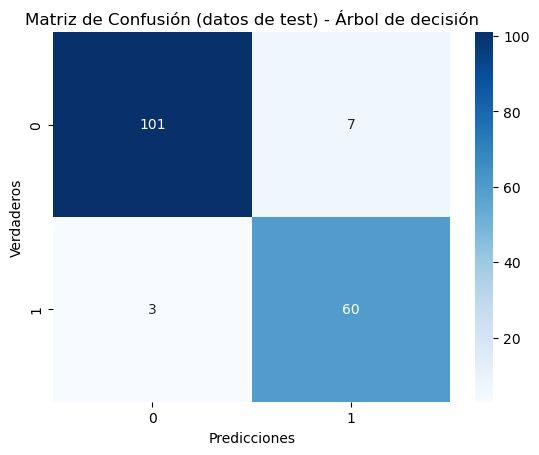

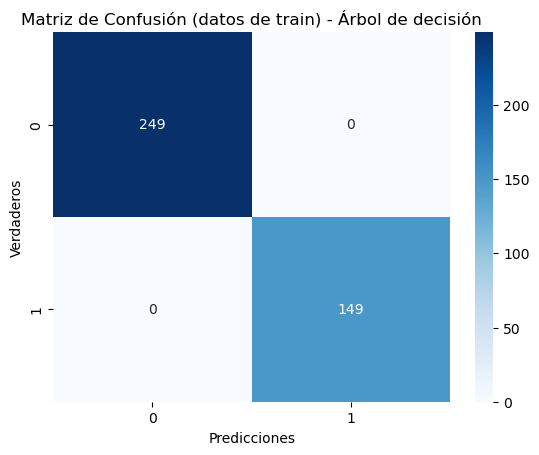

In [26]:
#Matriz de confusión para Random Forest (datos de test)
matriz_ad = confusion_matrix(y_test, clf_prediction_test)
mostrar_matriz_confusion(matriz_ad, title='Matriz de Confusión (datos de test) - Árbol de decisión')
#Matriz de confusión para Random Forest (datos de train)
matriz_ad_train = confusion_matrix(y_train, clf_prediction_train)
mostrar_matriz_confusion(matriz_ad_train, title='Matriz de Confusión (datos de train) - Árbol de decisión')


# MODELO DE APRENDIZAJE RANDOM FOREST

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
rf.score(x_train, y_train)

1.0

In [29]:
#Predicciones y evaluación final en el conjunto de prueba para Random Forest (datos de test)
rf_prediction_test = rf.predict(x_test)
print("Random Forest en el conjunto de prueba:")
print(classification_report(y_test, rf_prediction_test))


Random Forest en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [30]:
#Predicciones y evaluación final en el conjunto de entrenamiento para Random Forest (datos de test)
rf_prediction_train = rf.predict(x_train)
print("Random Forest en el conjunto de entrenamiento:")
print(classification_report(y_train, rf_prediction_train))


Random Forest en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



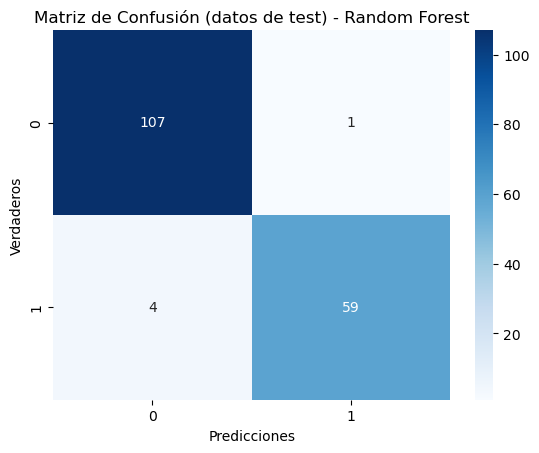

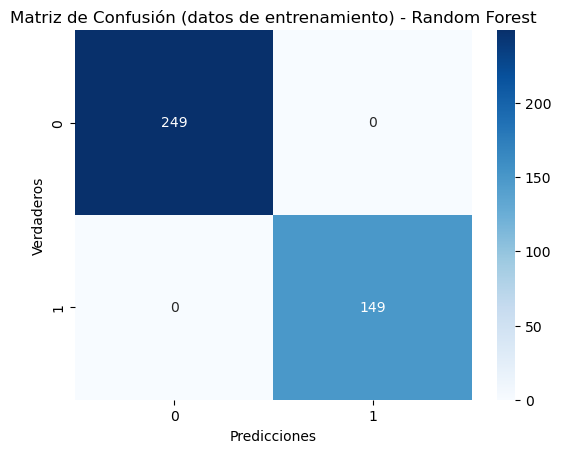

In [31]:
#Matriz de confusión para Random Forest (datos de test)
matriz_rf = confusion_matrix(y_test, rf_prediction_test)
mostrar_matriz_confusion(matriz_rf, title='Matriz de Confusión (datos de test) - Random Forest')
#Matriz de confusión para Random Forest (datos de train)
matriz_rf_train = confusion_matrix(y_train, rf_prediction_train)
mostrar_matriz_confusion(matriz_rf_train, title='Matriz de Confusión (datos de entrenamiento) - Random Forest')

# MODELO DE APRENDIZAJE K-NEAREST NEIGHBORS

In [32]:
KNN=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [33]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [34]:
#Predicciones y evaluación final en el conjunto de prueba para KNN (datos de test)
y_predict= KNN.predict(x_test)
print("KNN en el conjunto de prueba:")
print(classification_report(y_test, y_predict))

KNN en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [35]:
KNN.score(x_train, y_train)

1.0

In [36]:
#Predicciones y evaluación final en el conjunto de prueba para KNN (datos de train)
y_predict_train= KNN.predict(x_train)
print("KNN en el conjunto de train:")
print(classification_report(y_train, y_predict_train))

KNN en el conjunto de train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



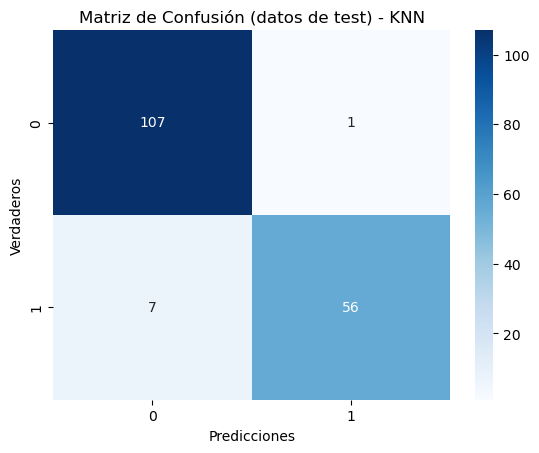

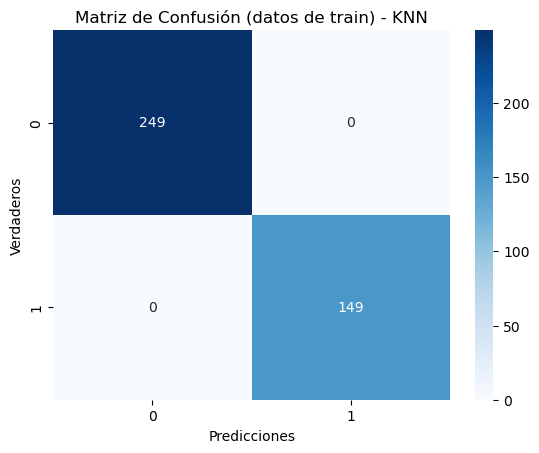

In [37]:
#Matriz de confusión para KNN (datos de test)
matriz_knn = confusion_matrix(y_test, y_predict)
mostrar_matriz_confusion(matriz_knn, title='Matriz de Confusión (datos de test) - KNN')

#Matriz de confusión para KNN (datos de train)
matriz_knn_train = confusion_matrix(y_train, y_predict_train)
mostrar_matriz_confusion(matriz_knn_train, title='Matriz de Confusión (datos de train) - KNN')